In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from cosmosis.model import FFNet
from cosmosis.learning import Learn, Selector
from cosmosis.dataset import SKDS

from dataset import QM7, QM7b, QM7X, QM9, ANI1x

from torch.optim import Adam
from torch.nn import MSELoss, L1Loss
from torch.optim.lr_scheduler import ReduceLROnPlateau

CDataset created...
SKDS make_regression created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:02.769324
epoch: 0, lr: 0.01
train loss: 15849.763708043982, val loss: 11535.0580078125
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:07.418030
epoch: 10, lr: 0.01
train loss: 389.6994323730469, val loss: 608.7446044921875
sklearn train metric: 0, sklearn validation metric: 0
test loss: 279.29969482421876
learning time: 0:00:11.769582
sklearn test metric: 
0 



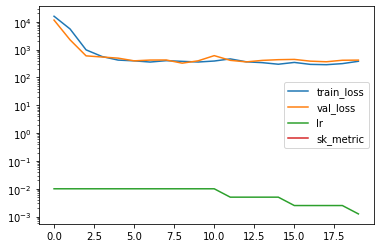

In [2]:
model_params = {'D_in': 128, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features': ['X'],
                              'targets': ['y'],
                              'features_dtype': 'float32',
                              'targets_dtype': 'float32',
                              'make': 'make_regression',
                              'transform': [],
                              'target_transform': [],
                              'sk_params': {'n_samples': 10000,
                                            'n_features': 128}}}

metrics_params = {'report_interval': 10}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7, .15)}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

l = Learn([SKDS], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=MSELoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=20)

CDataset created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:00.816855
epoch: 0, lr: 0.01
train loss: 1531.386474609375, val loss: 1501.683837890625
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:07.475100
epoch: 10, lr: 0.01
train loss: 33.948611209267064, val loss: 33.02544069290161
sklearn train metric: 0, sklearn validation metric: 0
test loss: 32.18827295303345
learning time: 0:00:13.720886
sklearn test metric: 
0 



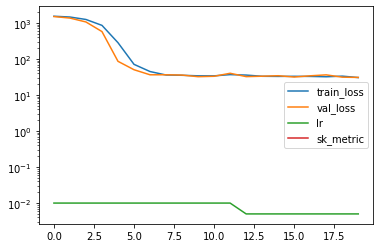

In [3]:
model_params = {'D_in': 23*23+23*32, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atoms',7,32,None,True)]}

ds_params = {'train_params': {'features': ['coulomb'],
                              'targets': ['ae'],
                              'embeds': ['atoms'],
                              'in_file': './data/qm7/qm7.mat',
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

opt_params = {'lr': 0.01}

l = Learn([QM7], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=20)

CDataset created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:00.466052
epoch: 0, lr: 0.01
train loss: 1562.3507786800988, val loss: 1545.8498229980469
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:04.899274
epoch: 10, lr: 0.01
train loss: 57.22529561896073, val loss: 62.89164924621582
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:09.296898
epoch: 20, lr: 0.005
train loss: 45.28531445954975, val loss: 54.40776443481445
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:13.740752
epoch: 30, lr: 0.0025
train loss: 41.09116704840409, val loss: 50.14443588256836
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:18.121325
epoch: 40, lr: 0.00125
train loss: 39.516449777703535, val loss: 53.21466636657715
sklearn train metric: 0, sklearn validation metric: 0
test loss: 51.913079261779785
learning time: 0:00:22.245168
sklearn test metric: 
0 



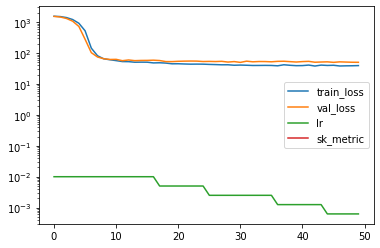

In [4]:
model_params = {'D_in': 23*23, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features': ['coulomb'],
                              'targets': ['E'],
                              'in_file': './data/qm7b/qm7b.mat',
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM7b], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=50)

In [5]:
#find the longest molecule

ds_params = {'train_params': {'features': ['atNUM'],
                              'pad': None,
                              'targets': [],
                              'embeds': [],
                              'selector': ['opt']}}

qm7x = QM7X(**ds_params['train_params'])
l = 0
for i in qm7x.ds_idx:
    s = qm7x[i][0].shape[0]
    if s > l:
        l = s
print('longest molecule length: ', l)

qm7x[1]

mapping...  <HDF5 file "1000.hdf5" (mode r)>
mapping...  <HDF5 file "2000.hdf5" (mode r)>
mapping...  <HDF5 file "3000.hdf5" (mode r)>
mapping...  <HDF5 file "4000.hdf5" (mode r)>
mapping...  <HDF5 file "5000.hdf5" (mode r)>
mapping...  <HDF5 file "6000.hdf5" (mode r)>
mapping...  <HDF5 file "7000.hdf5" (mode r)>
mapping...  <HDF5 file "8000.hdf5" (mode r)>
molecular formula (idmol) mapped:  6950
total molecular structures (idconf) mapped:  41537
CDataset created...
longest molecule length:  23


(array([6., 1., 1., 1., 1.], dtype=float32), [], [])

mapping...  <HDF5 file "1000.hdf5" (mode r)>
mapping...  <HDF5 file "2000.hdf5" (mode r)>
mapping...  <HDF5 file "3000.hdf5" (mode r)>
mapping...  <HDF5 file "4000.hdf5" (mode r)>
mapping...  <HDF5 file "5000.hdf5" (mode r)>
mapping...  <HDF5 file "6000.hdf5" (mode r)>
mapping...  <HDF5 file "7000.hdf5" (mode r)>
mapping...  <HDF5 file "8000.hdf5" (mode r)>
molecular formula (idmol) mapped:  6950
total molecular structures (idconf) mapped:  41537
CDataset created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:01.031625
epoch: 0, lr: 0.01
train loss: 66.40937383551346, val loss: 45.14935874938965
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:09.507416
epoch: 10, lr: 0.01
train loss: 2.3051713642321134, val loss: 2.201038271188736
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:18.018853
epoch: 20, lr: 0.01
train loss: 2.3723430759028385, val loss: 2.2188185453414917
sklearn train metric: 0, sklearn validation metric: 0

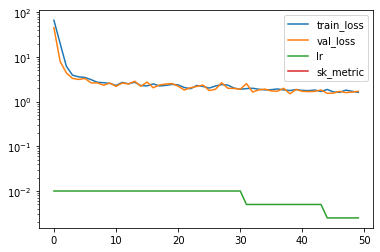

In [6]:
model_params = {'D_in': 23*23+23*64, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atNUM',9,64,None,True)]}

ds_params = {'train_params': {'features': ['distance'],
                              'pad': 23,
                              'targets': ['eAT'],
                              'embeds': ['atNUM'],
                              'selector': ['opt'],
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM7X], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=50)

loading QM9 datadic from a pickled copy...
CDataset created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:06.487329
epoch: 0, lr: 0.01
train loss: 55.13692120410481, val loss: 9.118437992899041
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:19.010038
epoch: 2, lr: 0.01
train loss: 7.817252383512609, val loss: 8.37733899292193
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:31.509609
epoch: 4, lr: 0.01
train loss: 7.327561370464934, val loss: 7.00941949141653
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:44.027573
epoch: 6, lr: 0.01
train loss: 7.077217453334178, val loss: 6.85970121308377
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:56.570982
epoch: 8, lr: 0.01
train loss: 7.023670276673902, val loss: 6.488301302257337
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:01:09.049929
epoch: 10, lr: 0.01
train loss: 6.811745057252943, val loss: 

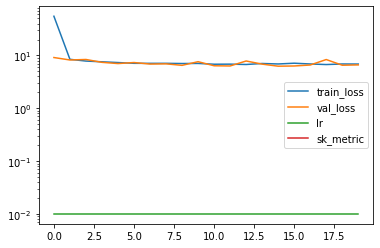

In [7]:
model_params = {'D_in': 29*29, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {#'n': 10000, 
                              'features': ['coulomb'],
                              'embeds': [], 
                              'targets': ['U0'],
                              'pad': 29, 
                              'filter_on': None,
                              'use_pickle': 'qm9.p',
                              'flatten': True}}

metrics_params = {'report_interval': 10}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}

opt_params = {'lr': 0.01}

l = Learn([QM9], FFNet, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=20)

creating QM9 dataset...
QM9 molecules scanned:  1
QM9 molecules created:  0
QM9 molecules scanned:  10001
QM9 molecules created:  1853
QM9 molecules scanned:  20001
QM9 molecules created:  4109
QM9 molecules scanned:  30001
QM9 molecules created:  5164
QM9 molecules scanned:  40001
QM9 molecules created:  8487
QM9 molecules scanned:  50001
QM9 molecules created:  10694
QM9 molecules scanned:  60001
QM9 molecules created:  15309
QM9 molecules scanned:  70001
QM9 molecules created:  20609
QM9 molecules scanned:  80001
QM9 molecules created:  25898
QM9 molecules scanned:  90001
QM9 molecules created:  32036
QM9 molecules scanned:  100001
QM9 molecules created:  38581
QM9 molecules scanned:  110001
QM9 molecules created:  46307
QM9 molecules scanned:  120001
QM9 molecules created:  54330
QM9 molecules scanned:  130001
QM9 molecules created:  58020
total uncharacterized molecules removed:  467
total QM9 molecules created:  57590
pickling a copy of the QM9 datadic...
CDataset created...
CMod

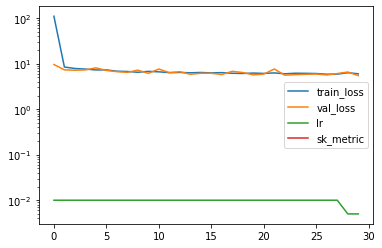

In [8]:
model_params = {'D_in': 29*29, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': []}

ds_params = {'train_params': {#'n': 10000,
                              'features': ['coulomb'],
                              'embeds': [],
                              'targets': ['U0'],
                              'pad': 29, 
                              'filter_on': ('n_atoms','>','18'),
                              'use_pickle': 'n_atoms_greater_than_18.p',
                              'flatten': True}}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}
opt_params = {'lr': 0.01}

l = Learn([QM9], FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=30)

molecules loaded:  1000
molecules loaded:  2000
molecules loaded:  3000
molecules loaded:  3114
CDataset created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:02.983432
epoch: 0, lr: 0.01
train loss: 564.303316004136, val loss: 529.7470092773438
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:14.763609
epoch: 5, lr: 0.01
train loss: 46.350862839642694, val loss: 42.78681182861328
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:26.627823
epoch: 10, lr: 0.01
train loss: 40.424245048971734, val loss: 37.40873591105143
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:38.230875
epoch: 15, lr: 0.01
train loss: 33.96495886409984, val loss: 31.55359141031901
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:49.824037
epoch: 20, lr: 0.005
train loss: 33.08600425720215, val loss: 36.601322174072266
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:01:01.604478

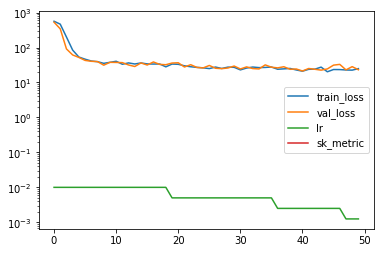

In [9]:
model_params = {'D_in': 63*63+63*32, 
                'H': 8192, 
                'D_out': 1, 
                'model_name': 'funnel',
                'embed_params': [('atomic_numbers',9,32,None,True)]}

ds_params = {'train_params': {'features': ['distance'],
                              'targets': ['wb97x_dz.energy'],
                              'embeds': ['atomic_numbers'],
                              'pad': 63, #length of the longest molecule in the dataset
                              'flatten': True,
                              'criterion': ['wb97x_dz.energy'],
                              'conformation': 'random',
                              'in_file': './data/ani1x/ani1x-release.h5'}}

metrics_params = {'report_interval': 20}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}
opt_params = {'lr': 0.01}

l = Learn([ANI1x], FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=128, epochs=50)